# SI 618 - Homework #3: Data Visualization

Version 2022.01.30.1.CT

In [641]:
MY_UNIQNAME = 'michengz'

## Background

This homework assignment focuses on the visual analysis of the COVID-19 data avaiable here: https://covid19datahub.io/articles/api/python.html. A description of the dataset can be found at https://covid19datahub.io/articles/doc/data.html

Your main task in this assignment is to explore the data *using the data manipulation, analysis, and visualization methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas, matplotlib and seaborn documentation, as well as Stack Overflow, or other online resources.  

## Total Points and Rubric

Each question is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in 
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

## Getting the data


The following cell should install the most up-to-date version of the 
COVID-19 datahub.  Alternatively, you can consult the datahub documentation to download the data files directly.

In [642]:
pip install --upgrade covid19dh

Note: you may need to restart the kernel to use updated packages.


### Restart the kernel to import the module and access the data

In [643]:
from covid19dh import covid19

## Answer the questions below. 
For each question, you should
1. Write code that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [644]:
# Load all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### <font color='#8B0000'> Q1 How many different countries are represented in the country-level data set?</font>
- Refer to the documentation to call the covid19() function with appropriate parameters (https://covid19datahub.io/articles/api/python.html)

In [645]:
df, src = covid19(level = 1,verbose = False, raw = False)

In [646]:
df.head(10)

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
0,AFG,2020-01-01,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
1,AFG,2020-01-02,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
2,AFG,2020-01-03,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
3,AFG,2020-01-04,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
4,AFG,2020-01-05,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
5,AFG,2020-01-06,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
6,AFG,2020-01-07,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
7,AFG,2020-01-08,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
8,AFG,2020-01-09,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF
9,AFG,2020-01-10,0.0,0,0,0,0,0.0,0,0,...,AFN,1,Afghanistan,NaN,NaN,33.0,65.0,NaN,NaN,AF


In [647]:
src.head(2)

,iso_alpha_3,administrative_area_level,data_type,url,title,year,bibtype,author,institution,textVersion
742,AFG,1,deaths,https://github.com/CSSEGISandData/COVID-19,Johns Hopkins Center for Systems Science and E...,2020,NaN,NaN,NaN,NaN
743,AFG,1,confirmed,https://github.com/CSSEGISandData/COVID-19,Johns Hopkins Center for Systems Science and E...,2020,NaN,NaN,NaN,NaN


In [648]:
src.columns

Index(['iso_alpha_3', 'administrative_area_level', 'data_type', 'url', 'title',
       'year', 'bibtype', 'author', 'institution', 'textVersion'],
      dtype='object')

In [649]:
src.iso_alpha_3.unique()

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAC', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB',
       'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DPC', 'DZA',
       'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GPC',
       'GRC', 'GRD', 'GTM', 'GUM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT',
       'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU',
       'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL',
       'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP', 'MOZ', 'MRT',
       'MSZ', 'MUS',

There are 199 different countries in total that are represented in the country-level dataset, which pretty much covers the total amount of countries over the world.

### <font color='#8B0000'> Q2 Create a line chart that shows the total number of cases over time.</font>

In [650]:
df.columns

Index(['id', 'date', 'vaccines', 'tests', 'confirmed', 'recovered', 'deaths',
       'hosp', 'vent', 'icu', 'population', 'school_closing',
       'workplace_closing', 'cancel_events', 'gatherings_restrictions',
       'transport_closing', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns', 'testing_policy', 'contact_tracing',
       'stringency_index', 'iso_alpha_3', 'iso_alpha_2', 'iso_numeric',
       'currency', 'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'key', 'key_apple_mobility',
       'key_google_mobility'],
      dtype='object')

In [651]:
df[['date','confirmed','iso_alpha_3']]

,date,confirmed,iso_alpha_3
0,2020-01-01,0,AFG
1,2020-01-02,0,AFG
2,2020-01-03,0,AFG
3,2020-01-04,0,AFG
4,2020-01-05,0,AFG
...,...,...,...
93326,2021-04-09,37147,ZWE
93327,2021-04-10,37273,ZWE
93328,2021-04-11,37288,ZWE
93329,2021-04-12,37307,ZWE


In [652]:
cases_data = df[['date','confirmed']].groupby('date').sum()
cases_data

,confirmed
date,
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,1
2020-01-05,1
...,...
2021-04-09,134753310
2021-04-10,135452194
2021-04-11,136069498


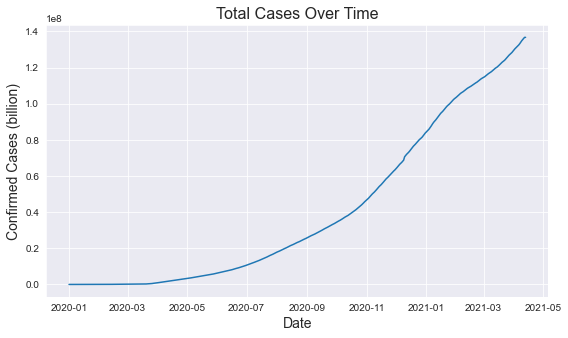

In [653]:
# Plotting Total Cases Over Time
plt.figure(figsize=(9,5))
sns.lineplot(x = 'date', y = 'confirmed', data = cases_data)
plt.xlabel('Date' ,fontsize = 14)
plt.ylabel('Confirmed Cases (billion)',fontsize = 14)
plt.title('Total Cases Over Time', fontsize = 16)

plt.show()

As shown in the plotted line chart above, the total number of cases increased over time. The cumulative number of confirmed cases reached up to almost 1.4 billion within 16 months, and had no sign of easing towards the end of April 2021.

### <font color='#8B0000'>Q3 Use the country-level data set to create a histogram to:</font>
- Show the distribution of values for the number of hospitalizations per 1000 people.  
- Draw a red vertical line that shows the median value on the histogram.

In [654]:
# Setting Up Data for Hospitalization Distribution
hosp_df = df[['iso_alpha_3','hosp']].groupby('iso_alpha_3').sum()
hosp_df = hosp_df[hosp_df['hosp'] != 0] # remove countries with 0 hospitalizations in total
population_df = df[['iso_alpha_3','population']].groupby('iso_alpha_3').tail(1).set_index('iso_alpha_3')
population_df = population_df[population_df.index.isin(hosp_df.index)]
hosp_df['population'] = population_df['population']

# Calculate and Create Column for Hospitalizations/Population * 1000
hosp_df['hosp_per_1000'] = hosp_df['hosp']/population_df['population'] * 1000
hosp_df = hosp_df[hosp_df['hosp_per_1000'] < 1000] # remove unreasonable outliers

hosp_df.head(5)

,hosp,population,hosp_per_1000
iso_alpha_3,,,
AUS,43460.4,24982688,1.739621
AUT,397027.0,8840521,44.909910
BEL,851449.0,11433256,74.471262
BGR,1058423.0,7025037,150.664402
CAN,725973.0,37057765,19.590307


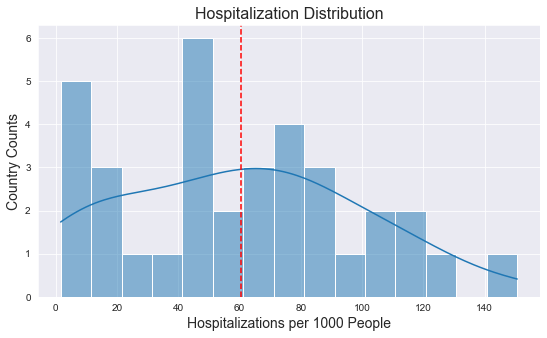

In [655]:
# Plotting Hospitalization Distribution
plt.figure(figsize=(9,5))
ax = sns.histplot(x = 'hosp_per_1000', data = hosp_df, bins = 15, kde = True)
plt.xlabel('Hospitalizations per 1000 People' ,fontsize = 14)
plt.ylabel('Country Counts',fontsize = 14)
plt.title('Hospitalization Distribution', fontsize = 16)
ax.axvline(hosp_df['hosp_per_1000'].median(), color='r', linestyle='--')

plt.show()

As shown in the histogram above, the hospitalization distribution falls between the range from 0 to 160 hospitalizations per 1000 people. A considerable amount of countries have 40 to 50 hospitalizations per 1000 people, as well as 0 to 10 hospitalizations per 1000 people. The distribution doesn't seem normally distributed and is slightly skewed to the right side, with a median falling around 60 hospitalizations per 1000 people.

### <font color='#8B0000'> Q4 Create a visualization that shows the  number of tests per day in the United States and indicate the median value on your visualization.</font>

In [656]:
df, src = covid19("USA",verbose = False, raw = False)
df.tail()

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
87698,USA,2021-04-09,178837781.0,385064247,31084962,6298082,561074,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87699,USA,2021-04-10,183467709.0,385064247,31151495,6298082,561783,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87700,USA,2021-04-11,187047131.0,385064247,31197873,6298082,562066,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87701,USA,2021-04-12,189692045.0,385064247,31268107,6298082,562533,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US
87702,USA,2021-04-13,189692045.0,385064247,31268107,6298082,562533,35536.0,0,8433,...,USN,1,United States,NaN,NaN,38.0,-97.0,NaN,United States,US


In [657]:
# Setting Up Data for Tests Graph
import warnings
warnings.filterwarnings('ignore')

test_df = df[['date','tests']]
test_df['tests_per_day'] = test_df[['tests']] - test_df[['tests']].shift(periods = 1, fill_value = 0)
test_df.sample(3)

,date,tests,tests_per_day
87482,2020-09-05,95910957,812743
87295,2020-03-02,922,550
87274,2020-02-10,0,0


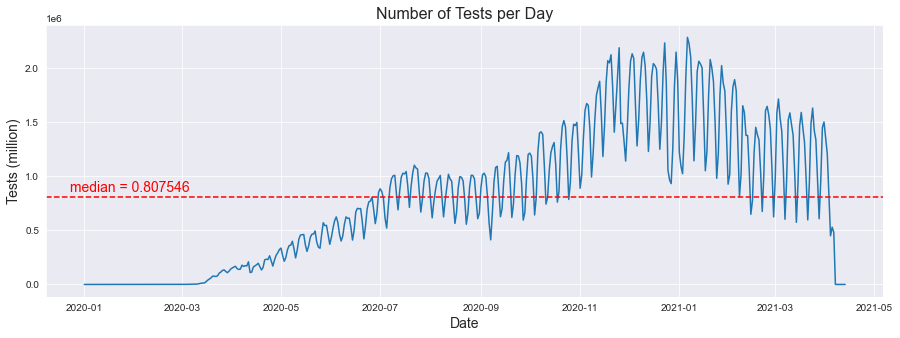

In [658]:
# Plotting Number of Tests per Day
plt.figure(figsize=(15,5))
ax = sns.lineplot(x = 'date', y = 'tests_per_day', data = test_df)
plt.xlabel('Date' ,fontsize = 14)
plt.ylabel('Tests (million)',fontsize = 14)
plt.title('Number of Tests per Day', fontsize = 16)
ax.axhline(test_df['tests_per_day'].median(), color='r', linestyle='--')
plt.text(0.1,0.4,f'median = {test_df["tests_per_day"].median()/1000000}', fontsize = 14, color = 'r',
         horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.show()

From the line chart above, we could see that there are drastic changes in number of tests per day periodically. The number of tests per day kept on increasing until the beginning of 2021 and started to decrease rapidly afterwards. Aside from that, the median number of tests per day is about 807546.

## For questions below:
- You will have to call the covid19() function again **with parameters specific to Canada**. 
- Set the parameter <code>level = 2</code> in the call to covid19().

In [659]:
canada,src = covid19("CAN",level = 2,verbose = False, raw = False)

In [660]:
canada.tail()

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,...,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_google_mobility,key_apple_mobility,key_numeric,key_alpha_2
341770,eef40c88,2021-04-09,0.0,16449.0,43.0,42,0,0.0,0,0,...,Canada,Northwest Territories,NaN,64.8255,-124.8457,NaN,Northwest Territories,Northwest Territories,NaN,NaN
341771,eef40c88,2021-04-10,0.0,16498.0,43.0,42,0,0.0,0,0,...,Canada,Northwest Territories,NaN,64.8255,-124.8457,NaN,Northwest Territories,Northwest Territories,NaN,NaN
341772,eef40c88,2021-04-11,0.0,16610.0,43.0,42,0,0.0,0,0,...,Canada,Northwest Territories,NaN,64.8255,-124.8457,NaN,Northwest Territories,Northwest Territories,NaN,NaN
341773,eef40c88,2021-04-12,0.0,16662.0,43.0,42,0,0.0,0,0,...,Canada,Northwest Territories,NaN,64.8255,-124.8457,NaN,Northwest Territories,Northwest Territories,NaN,NaN
341774,eef40c88,2021-04-13,0.0,16662.0,43.0,42,0,0.0,0,0,...,Canada,Northwest Territories,NaN,64.8255,-124.8457,NaN,Northwest Territories,Northwest Territories,NaN,NaN


### <font color='#8B0000'> Q5 Create a bar plot to show the number of tests conducted in each province.  </font>
Order the provinces from west to east (use your best judgement for cases where the order is unclear).  Which Canadian province that has conducted the most tests?

In [661]:
test_can_df = canada[['administrative_area_level_2','tests']].groupby('administrative_area_level_2').tail(1)
test_can_df

,administrative_area_level_2,tests
2324,Prince Edward Island,131038.0
71144,Manitoba,613301.0
91604,Yukon,8680.0
183674,Nunavut,10040.0
192509,Ontario,12997225.0
242729,Quebec,7569518.0
271094,Nova Scotia,450876.0
284114,British Columbia,2298860.0
304574,Newfoundland and Labrador,227630.0
305504,New Brunswick,276498.0


In [662]:
# Ordering Provinces by Longitude (West to East)
sort = canada[['administrative_area_level_2','longitude']].groupby('administrative_area_level_2').tail(1).sort_values(by = 'longitude')['administrative_area_level_2'].to_list()
sort

['Yukon',
 'Northwest Territories',
 'British Columbia',
 'Alberta',
 'Saskatchewan',
 'Manitoba',
 'Ontario',
 'Nunavut',
 'Quebec',
 'New Brunswick',
 'Nova Scotia',
 'Prince Edward Island',
 'Newfoundland and Labrador']

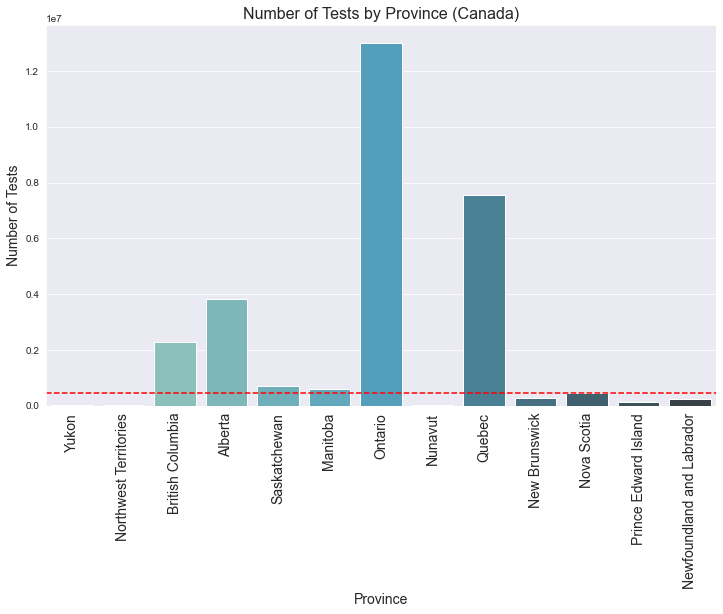

In [663]:
# Plotting Number of Tests by Province
plt.figure(figsize=(12,7))
ax = sns.barplot(x = 'administrative_area_level_2',y = 'tests', data = test_can_df, order = sort, palette = 'GnBu_d')
plt.xlabel('Province' ,fontsize = 14)
plt.ylabel('Number of Tests',fontsize = 14)
plt.title('Number of Tests by Province (Canada)', fontsize = 16)
ax.axhline(test_can_df['tests'].median(), color='r', linestyle='--')
ax.tick_params('x', labelrotation = 90, labelsize = 14)

plt.show()

As shown in the bar chart above, Ontario had the highest total number of test, followed by provinces such as Quebec and Alberta. It seems like the provinces that are nearer to the coasts have lower number of tests in total, and are lower than the median number of tests as well. Provinces such as Nunavut, Yukon, and Northwest Territories all have significanlly low numbers of tests made during the pandemic. However, this might result from the population difference across each province.

### <font color='#8B0000'> Q6 Create a bar plot that shows the number of tests conducted per 1000 people for each province in Canada.</font>
How would you interpret the results of this bar plot given the results of bar plot in question 5. 

In [664]:
test_can_df['population'] = canada.groupby('administrative_area_level_2').tail(1)['population']
test_can_df['tests_per_1000'] = test_can_df['tests'] / test_can_df['population'] * 1000
test_can_df

,administrative_area_level_2,tests,population,tests_per_1000
2324,Prince Edward Island,131038.0,158158.0,828.525904
71144,Manitoba,613301.0,1377517.0,445.222092
91604,Yukon,8680.0,41078.0,211.305322
183674,Nunavut,10040.0,38780.0,258.896338
192509,Ontario,12997225.0,14711827.0,883.454176
242729,Quebec,7569518.0,8537674.0,886.601901
271094,Nova Scotia,450876.0,977457.0,461.274511
284114,British Columbia,2298860.0,5110917.0,449.794039
304574,Newfoundland and Labrador,227630.0,521365.0,436.603915
305504,New Brunswick,276498.0,779993.0,354.487797


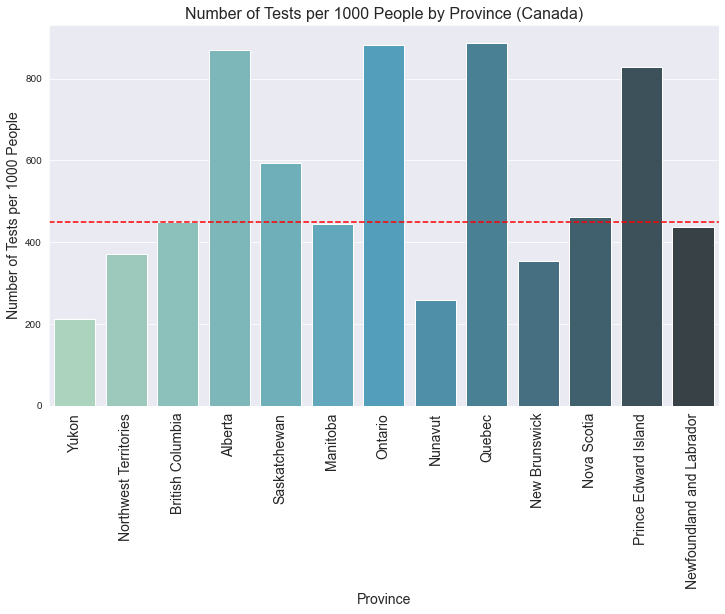

In [665]:
# Plotting Number of Tests by Province
plt.figure(figsize=(12,7))
ax = sns.barplot(x = 'administrative_area_level_2',y = 'tests_per_1000', data = test_can_df, order = sort, palette = 'GnBu_d')
plt.xlabel('Province' ,fontsize = 14)
plt.ylabel('Number of Tests per 1000 People',fontsize = 14)
plt.title('Number of Tests per 1000 People by Province (Canada)', fontsize = 16)
ax.axhline(test_can_df['tests_per_1000'].median(), color='r', linestyle='--')
ax.tick_params('x', labelrotation = 90, labelsize = 14)

plt.show()

If we take he population for each province into account, it would be fairer to compare the number of tests across provinces because provinces with bigger cities would usually have higher population, for instance, Quebec and Ontario. Looking at the bar chart above, we could see that this time, Quebec turned out to have the highest number of tests per 1000 people, followed by Ontario and Alberta. Prince Edward Island had a significant amount of tests per 1000 people as well, which was something that we definitely couln't tell from the bar graph in Q5. Provinces such as Yukon and Nunavut, in this case, have the lowest number of tests per 1000 people. 

### <font color='#8B0000'> Q7 Create a visualization that shows which Canadian province has the highest recovery rate. </font>
Recovery rate is calculated as the number of recovered cases divided by the number of confirmed cases.

In [666]:
recovery_df = canada[['administrative_area_level_2','recovered','confirmed']].groupby('administrative_area_level_2').tail(1)
recovery_df['recovery_rate'] = recovery_df['recovered']/recovery_df['confirmed']
recovery_df

,administrative_area_level_2,recovered,confirmed,recovery_rate
2324,Prince Edward Island,158,165.0,0.957576
71144,Manitoba,33008,35327.0,0.934356
91604,Yukon,73,74.0,0.986486
183674,Nunavut,391,395.0,0.989873
192509,Ontario,348684,391009.0,0.891754
242729,Quebec,304267,327982.0,0.927694
271094,Nova Scotia,1663,1775.0,0.936901
284114,British Columbia,102892,112829.0,0.911929
304574,Newfoundland and Labrador,1010,1030.0,0.980583
305504,New Brunswick,1553,1732.0,0.896651


In [667]:
sort = recovery_df[['administrative_area_level_2','recovery_rate']].sort_values(by = 'recovery_rate', ascending = False)['administrative_area_level_2'].to_list()
sort

['Nunavut',
 'Yukon',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Prince Edward Island',
 'Nova Scotia',
 'Manitoba',
 'Quebec',
 'Saskatchewan',
 'British Columbia',
 'New Brunswick',
 'Alberta',
 'Ontario']

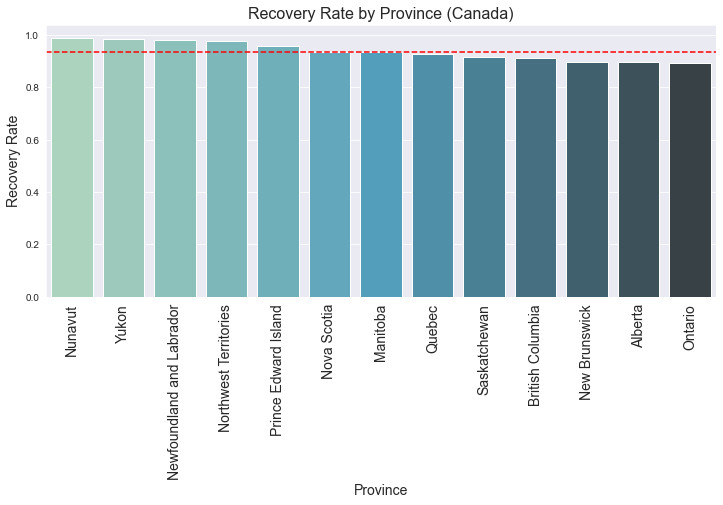

In [668]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x = 'administrative_area_level_2',y = 'recovery_rate', data = recovery_df, order = sort, palette = 'GnBu_d')
plt.xlabel('Province' ,fontsize = 14)
plt.ylabel('Recovery Rate',fontsize = 14)
plt.title('Recovery Rate by Province (Canada)', fontsize = 16)
ax.axhline(recovery_df['recovery_rate'].median(), color='r', linestyle='--')
ax.tick_params('x', labelrotation = 90, labelsize = 14)

plt.show()

As shown in the ordered bar chart above, the province with the highest recovery rate is Nunavut (with a recovery rate around 0.989), followed by the province Yukon and Newfoundland and Labrador. This may be the reason why Nunavut and Yukon had such low number of tests per 1000 people given their high recovery rate.

### <font color='#8B0000'> Q8 Create visualizations that show the impacts of _at least_ three policy measures on mortality or infection rates.</font>


See https://covid19datahub.io/articles/doc/data.html for descriptions of the available policy measures.  You are not limited to histograms and bar charts.  Remember that you can use subplots!


In [669]:
canada,src = covid19("CAN",level = 1,verbose = False, raw = False)

In [670]:
canada['case_each_day'] = canada[['confirmed']] - canada[['confirmed']].shift(periods = 1, fill_value = 0)
canada['death_each_day'] = canada[['deaths']] - canada[['deaths']].shift(periods = 1, fill_value = 0)
policy_df = canada[['date','case_each_day','death_each_day','school_closing','workplace_closing', 'cancel_events', 
                    'gatherings_restrictions','transport_closing', 'stay_home_restrictions',
                    'internal_movement_restrictions', 'international_movement_restrictions',
                    'information_campaigns', 'testing_policy', 'contact_tracing']]
policy_df.tail()

,date,case_each_day,death_each_day,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing
15472,2021-04-09,9243,38,3,3,2,4,1,2,2,4,2,2,1
15473,2021-04-10,8542,47,3,3,2,4,1,2,2,4,2,2,1
15474,2021-04-11,8656,33,3,3,2,4,1,2,2,4,2,2,1
15475,2021-04-12,8541,27,3,3,2,4,1,2,2,4,2,2,1
15476,2021-04-13,0,0,3,3,2,4,1,2,2,4,2,2,1


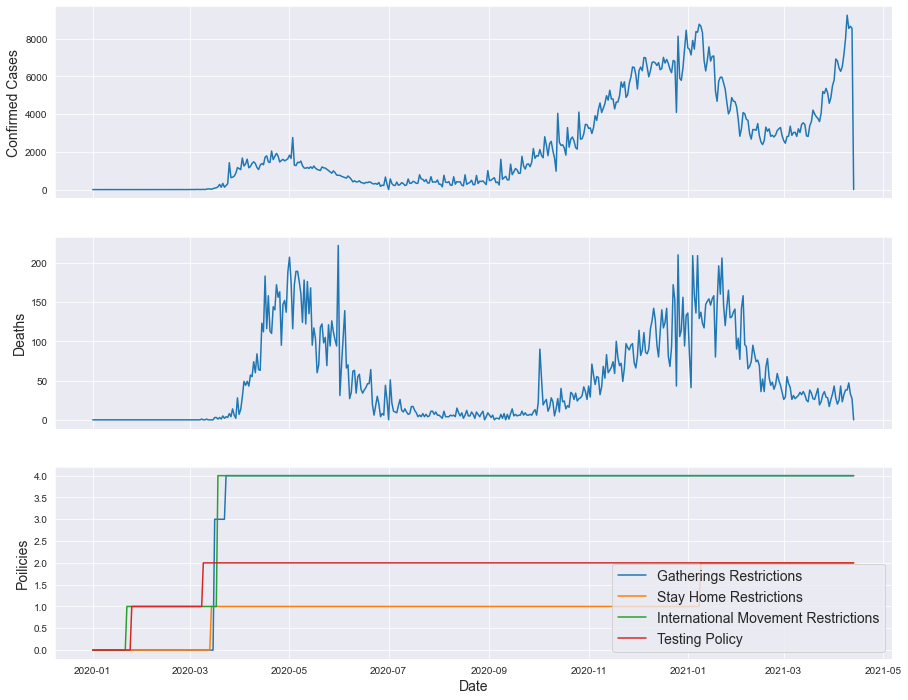

In [671]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,12), sharex = True)
sns.lineplot(x = 'date', y = 'case_each_day', data = policy_df, ax = ax1)
sns.lineplot(x = 'date', y = 'death_each_day', data = policy_df, ax = ax2)
sns.lineplot(x = 'date', y = 'gatherings_restrictions', data = policy_df, ax = ax3)
sns.lineplot(x = 'date', y = 'stay_home_restrictions', data = policy_df, ax = ax3)
sns.lineplot(x = 'date', y = 'international_movement_restrictions', data = policy_df, ax = ax3)
sns.lineplot(x = 'date', y = 'testing_policy', data = policy_df, ax = ax3)
ax3.legend(['Gatherings Restrictions', 'Stay Home Restrictions','International Movement Restrictions', 'Testing Policy'],fontsize = 14)
plt.xlabel('Date' ,fontsize = 14)
ax1.set_ylabel('Confirmed Cases',fontsize = 14)
ax2.set_ylabel('Deaths',fontsize = 14)
ax3.set_ylabel('Poilicies',fontsize = 14)

plt.show()

As we could see from the time series charts above, most policy changes were made around January to March 2020, when the number of confirmed cases and deaths each day started to increase. After restrictions such as gatherings, stay home, international movement, and testing policy were raised, the number of deaths eased to under 50 people after July 2020, and the number of confirmed cases dropped as well. No significant policy changes relevant to these restrictions were made afterwards, however, the number of confirmed cases and deaths each day increased during November 2021 once again. In other words, these four policy changes might had some positive impacts at the earlier stage of the pandemic, but did not have much impact on the second outbreak towards the end of 2021.

## <font color='green'> Please submit your completed notebook in .IPYNB and .HTML formats via Canvas </font>